In [1]:
function extrapolate(img, top, bottom, left, right)
    local img = img or {} 
    local tempImg = img:clone()
    local nRow = img:size(2)
    local nCol = img:size(3)
    -- print(nRow, nCol, top, bottom, left, right)
    if 	top > 0 then
    	tempImg = tempImg[{{}, {top, nRow}, {}}]
    else
    	local topWidth = math.abs(top) + 1
        tempImg = torch.cat(image.vflip(img[{{}, {1, topWidth}, {}}]), tempImg, 2)
    end
    local nRowNew = tempImg:size(2)
    if 	bottom <= nRow then	
    	local bottomWidth = nRow - bottom
    	tempImg = tempImg[{{}, {1, nRowNew - bottomWidth}, {}}]
    else
    	local bottomWidth = bottom - nRow
        tempImg = torch.cat(tempImg, image.vflip(img[{{}, {nRow - bottomWidth + 1, nRow}, {}}]), 2)
    end
    img = tempImg
    if 	left > 0 then
    	tempImg = tempImg[{{}, {}, {left, nCol}}]
    else
    	local leftWidth = math.abs(left) + 1
       	tempImg = torch.cat(image.hflip(tempImg[{{}, {}, {1, leftWidth}}]), tempImg, 3)
    end
    local nColNew = tempImg:size(3)
    if right <= nCol then 	
    	local rightWidth = nCol - right
    	tempImg = tempImg[{{}, {}, {1, nColNew - rightWidth}}]
    else
    	local rightWidth = right - nCol
    	tempImg = torch.cat(image.hflip(img[{{}, {}, {nCol - rightWidth +1, nCol}}]), tempImg, 3)
    end
    return tempImg
end

In [11]:
function extrapolate2(img, top, bottom, left, right)
    local img = img or {} 
    local tempImg = img:clone()
    local nRow = img:size(2)
    local nCol = img:size(3)
    if 	top > 0 then
    	img = img:narrow(2, top, nRow - top + 1)
    else
    	local topWidth = math.abs(top) + 1
    	for i = 1, topWidth do
        	img = torch.cat(tempImg[{ {}, {i}, {}}], img, 2)
        end
    end
    tempImg = img
    local nRowNew = img:size(2)
    if 	bottom <= nRow then	
    	img = img:narrow(2, 1, nRowNew - (nRow - bottom))
    else
    	local bottomWidth = bottom - nRow
    	for i = 1, bottomWidth do
        	img = torch.cat(img, tempImg[{ {}, {nRowNew - i + 1}, {}}], 2)
        end
    end
    tempImg = img
    if 	left > 0 then
    	img = img:narrow(3, left, nCol - left + 1)
    else
    	local leftWidth = math.abs(left) + 1
    	for i = 1, leftWidth do
        	img = torch.cat(tempImg[{ {}, {}, {i}}], img, 3)
        end
    end
    tempImg = img
    local nColNew = img:size(3)
    if right <= nCol then 	
    	img = img:narrow(3, 1, nColNew - (nCol - right))
    else
    	local rightWidth = right - nCol
    	for i = 1, rightWidth do
        	img = torch.cat(img, tempImg[{ {}, {}, {nColNew - i + 1}}], 3)
        end
    end
    return img
end

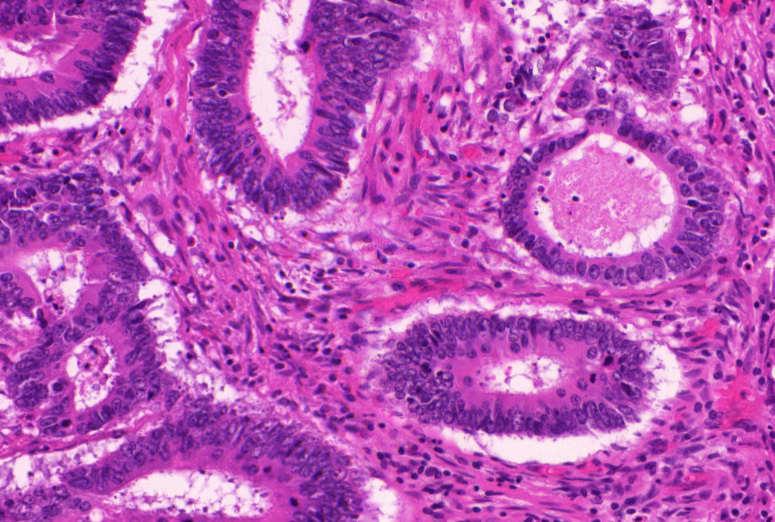

In [8]:
img = image.load('train_1.png', 3, 'double')
itorch.image(img)

In [4]:
function extrapolate(img, top, bottom, left, right)
    local img = img or {} 
    local tempImg = img:clone()
    local nRow = img:size(2)
    local nCol = img:size(3)
    -- print(nRow, nCol, top, bottom, left, right)
    if 	top > 0 then
    	tempImg = tempImg[{{}, {top, nRow}, {}}]
    else
    	local topWidth = math.abs(top) + 1
        tempImg = torch.cat(image.vflip(img[{{}, {1, topWidth}, {}}]), tempImg, 2)
    end
    local nRowNew = tempImg:size(2)
    if 	bottom <= nRow then	
    	local bottomWidth = nRow - bottom
    	tempImg = tempImg[{{}, {1, nRowNew - bottomWidth}, {}}]
    else
    	local bottomWidth = bottom - nRow
        tempImg = torch.cat(tempImg, image.vflip(img[{{}, {nRow - bottomWidth + 1, nRow}, {}}]), 2)
    end
    img = tempImg
    if 	left > 0 then
    	tempImg = tempImg[{{}, {}, {left, nCol}}]
    else
    	local leftWidth = math.abs(left) + 1
       	tempImg = torch.cat(image.hflip(tempImg[{{}, {}, {1, leftWidth}}]), tempImg, 3)
    end
    local nColNew = tempImg:size(3)
    if right <= nCol then 	
    	local rightWidth = nCol - right
    	tempImg = tempImg[{{}, {}, {1, nColNew - rightWidth}}]
    else
    	local rightWidth = right - nCol
    	tempImg = torch.cat(image.hflip(img[{{}, {}, {nCol - rightWidth +1, nCol}}]), tempImg, 3)
    end
    return tempImg
end

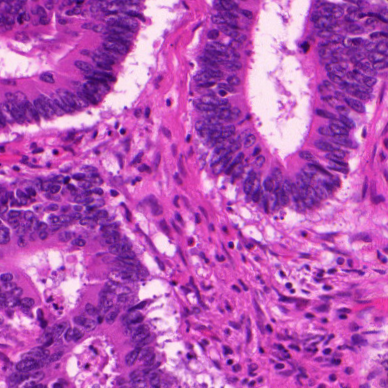

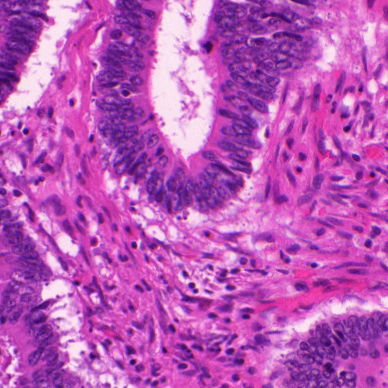

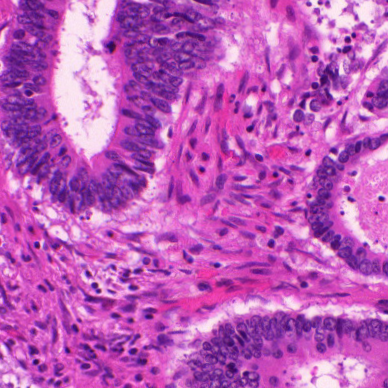

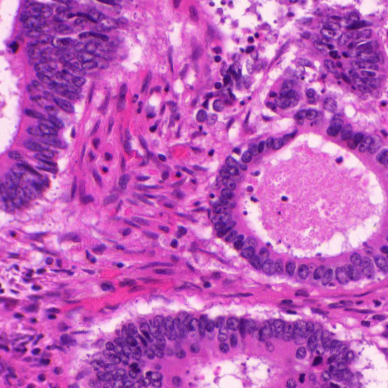

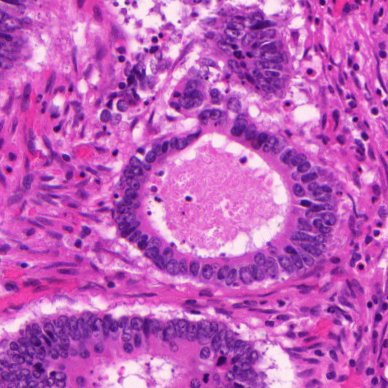

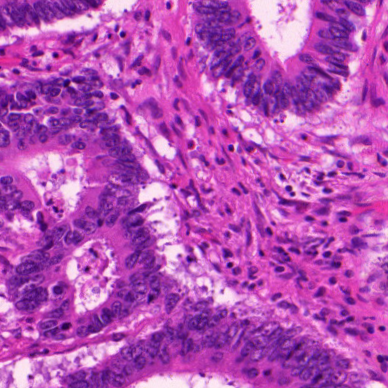

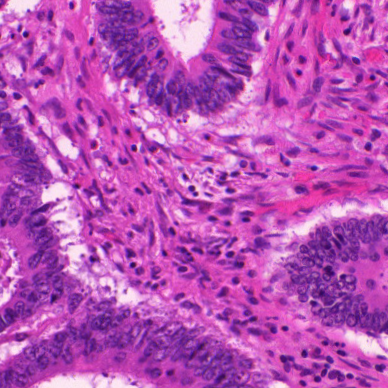

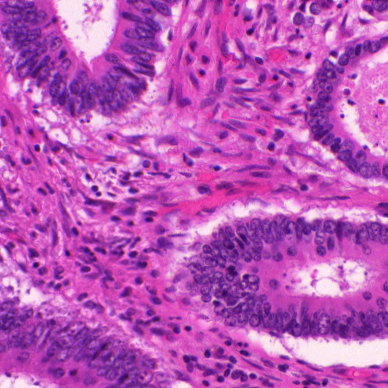

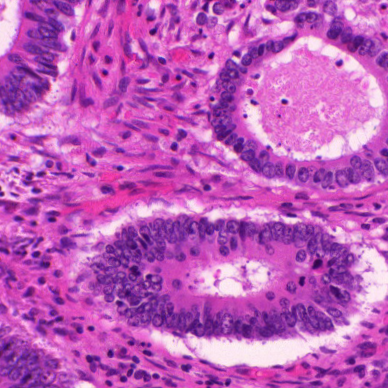

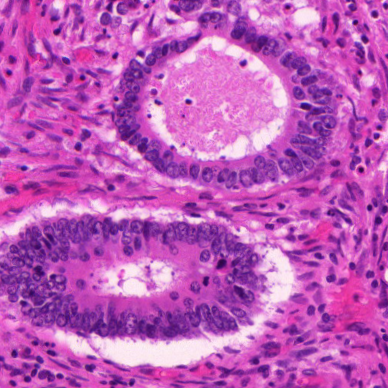

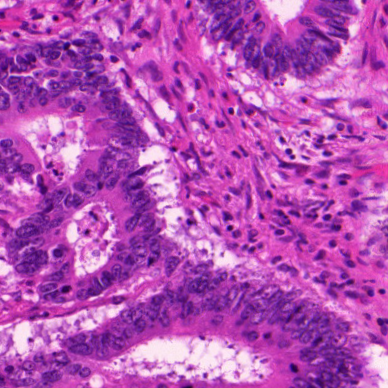

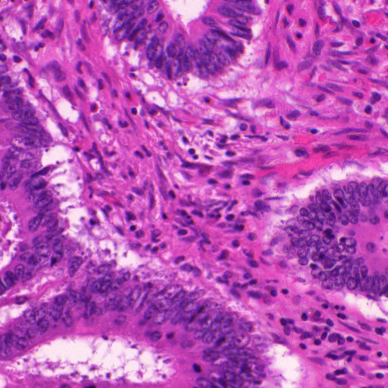

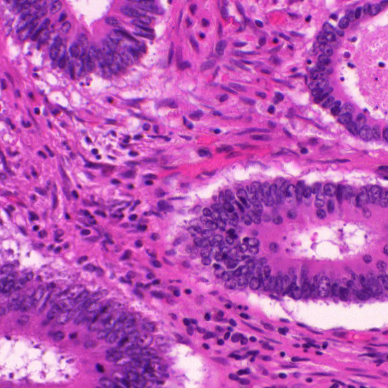

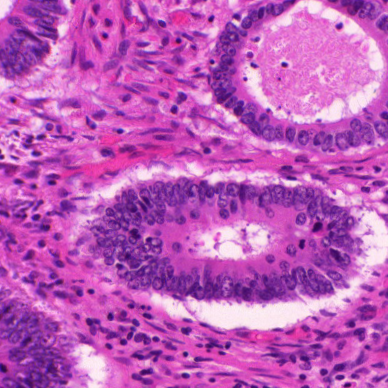

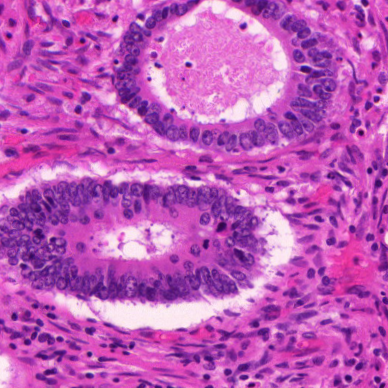

In [11]:
local imgChannelNum = img:size(1)
local imgRowNum = img:size(2)
local imgColNum = img:size(3)
local stepSize = math.floor(388/4)
tileCount = 0
rowStart = 1
rowEnd = rowStart + 387
while rowEnd < imgRowNum + stepSize do
    if 	rowEnd > imgRowNum then
        rowEnd = imgRowNum
        rowStart = imgRowNum - 387
    end
    colStart = 1
    colEnd = colStart + 387
    while colEnd < imgColNum + stepSize do
        -- print(string.format("Tile No. %d", tileCount))
        if 	colEnd > imgColNum then
            colEnd = imgColNum
            colStart = imgColNum - 387
        end

        local tile= extrapolate(img, rowStart - 0, rowEnd + 0, colStart - 0, colEnd + 0)
        print(rowStart, rowEnd, colStart, colEnd)
        tileCount = tileCount + 1
        --itorch.image(tile)
        colStart = colStart + stepSize
        colEnd = colStart + 387
    end
    rowStart = rowStart + stepSize
    rowEnd = rowStart + 387
end

In [12]:
tileCount

15	
